# Apriori Algorithm

In [4]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [11]:
data = pd.read_excel('G:\Online Retail.xlsx')

In [12]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [13]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [14]:
data.shape

(541909, 8)

In [16]:
data.isnull().values.any()

True

In [17]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [18]:
#stripping extra spaces in the description
data['Description'] = data['Description'].str.strip()

#Dropping the rows without any invoice number
data.dropna(axis = 0, subset = ['InvoiceNo'], inplace=True)
data['InvoiceNo'] = data['InvoiceNo'].astype('str')

#Dropping all transactions which were done on credit
data = data[~data['InvoiceNo'].str.contains('c')]

In [19]:
#Let's see the countries in our dataset

data.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [20]:
# splitting the data a/c to the region of transaction
# transactions done in france

basket_France=(data[data['Country']=="France"]
              .groupby(['InvoiceNo','Description'])['Quantity']
              .sum().unstack().reset_index().fillna(0)
              .set_index('InvoiceNo'))

In [21]:
# defining the hot encoding function to make the data suitable

def hot_encode(x):
    if(x<=0):
        return 0
    if(x>=1):
        return 1

In [22]:
# applying one hot encoding

basket_encoded = basket_France.applymap(hot_encode)
basket_France = basket_encoded

In [23]:
basket_France.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# building the model
frq_items = apriori(basket_France, min_support=0.1, use_colnames = True)

#collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric="lift", min_threshold=1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])

In [34]:
print(rules.head())

                             antecedents                      consequents  \
13       (SET/6 RED SPOTTY PAPER PLATES)    (SET/6 RED SPOTTY PAPER CUPS)   
11  (ROUND SNACK BOXES SET OF4 WOODLAND)                        (POSTAGE)   
12         (SET/6 RED SPOTTY PAPER CUPS)  (SET/6 RED SPOTTY PAPER PLATES)   
3        (PLASTERS IN TIN CIRCUS PARADE)                        (POSTAGE)   
6                   (RABBIT NIGHT LIGHT)                        (POSTAGE)   

    antecedent support  consequent support   support  confidence      lift  \
13            0.108460            0.117137  0.104121    0.960000  8.195556   
11            0.134490            0.650759  0.125813    0.935484  1.437527   
12            0.117137            0.108460  0.104121    0.888889  8.195556   
3             0.143167            0.650759  0.125813    0.878788  1.350404   
6             0.160521            0.650759  0.140998    0.878378  1.349775   

    leverage  conviction  
13  0.091417   22.071584  
11  0.038293  

# KNN

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
print(df.shape)
print(iris.target_names)

(150, 4)
['setosa' 'versicolor' 'virginica']


In [ ]:
# Here we want to target on setosa, versicolor, virginica

In [5]:
# add extra target as target 4 col are features 
df['target'] = iris.target #this shows me setosa started from 0 to ..
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df[df.target==1].head()    #this shows me versicolor started from 50 to ..

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [6]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [7]:
# split
setosa=df[:50]
versicolor=df[50:100]
virginica=df[100:]

In [8]:
df['flower_name']=df.target.apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [9]:
from sklearn.model_selection import train_test_split
x = df.drop(['target','flower_name'], axis='columns')
y = df.target


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)
print('Length of x_train ',len(x_train))
print('Length of x_test ',len(x_test))

Length of x_train  120
Length of x_test  30


In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [12]:
knn.score(x_test, y_test)

0.9666666666666667

In [13]:
from sklearn.metrics import confusion_matrix
p= knn.predict(x_test)
cm = confusion_matrix(y_test, p)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

In [14]:
# in diagonal represented to correct prediction
# other wrong prediction

Text(42.0, 0.5, 'Truth')

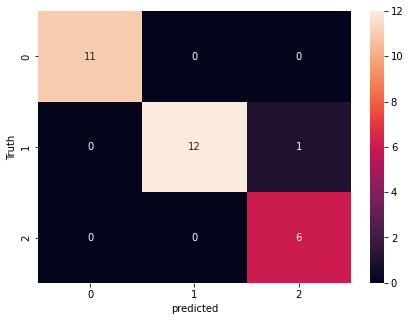

In [15]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, p))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [1]:
pip classfication_report

Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "classfication_report"

